In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [185]:
df = pd.read_csv("kc_house_data.csv")
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [186]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


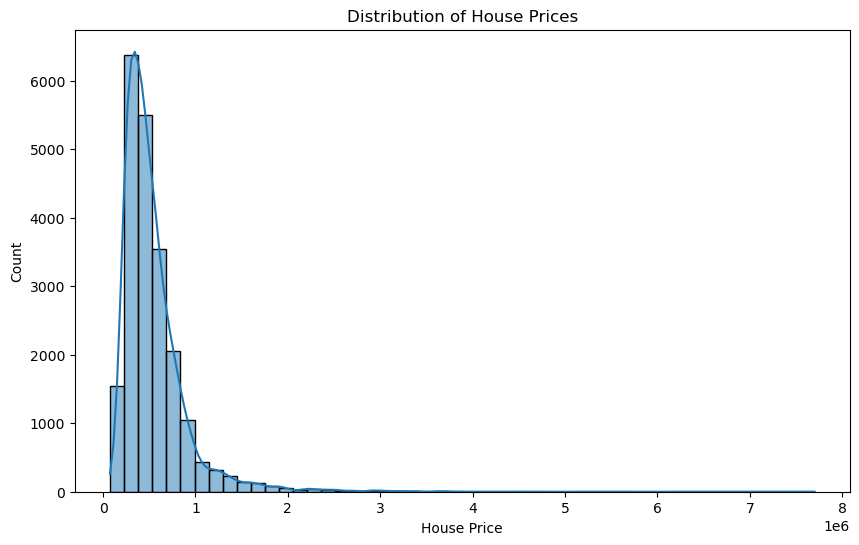

In [187]:
plt.figure(figsize = (10,6))
sns.histplot(df['price'],bins = 50, kde = True)
plt.xlabel("House Price")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()

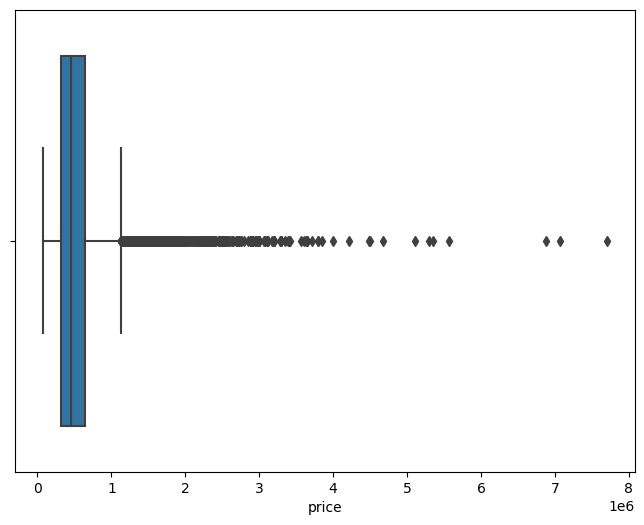

In [188]:
plt.figure(figsize = (8,6))
sns.boxplot(x = df["price"])
plt.show()

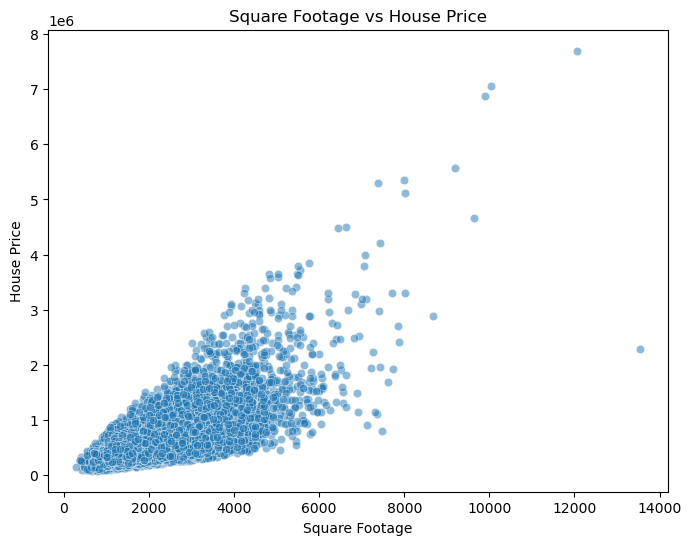

In [189]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df["sqft_living"],y = df["price"],alpha = 0.5)
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("Square Footage vs House Price")
plt.show()

In [190]:
df_new = df.drop(columns = ["date","id"])
df_new["log_price"] = np.log(df_new["price"])

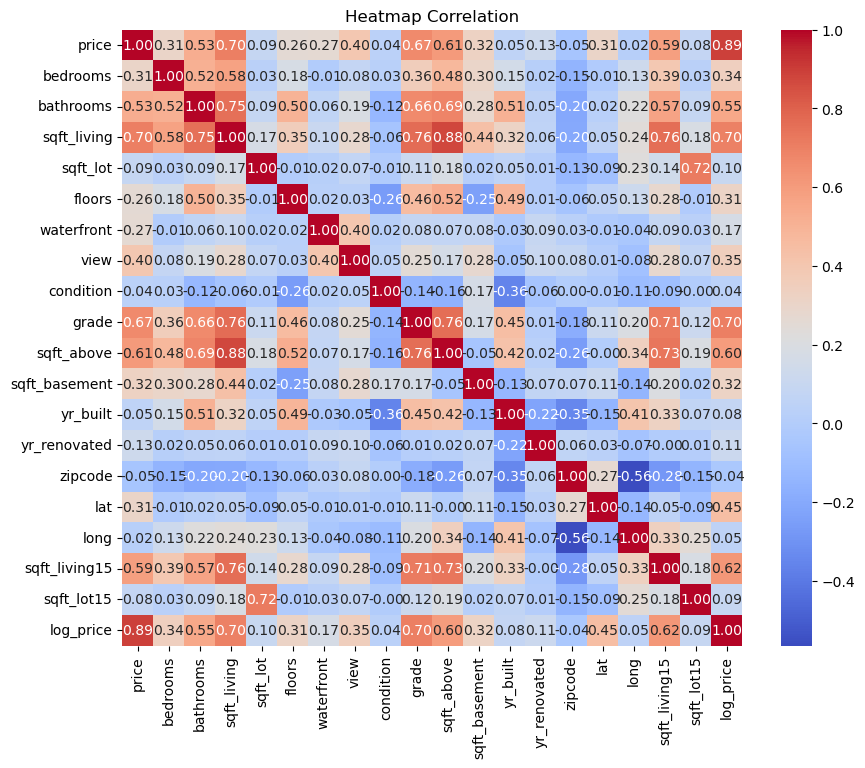

In [191]:
plt.figure(figsize = (10,8))
corr = df_new.corr()
sns.heatmap(corr,annot = True,cmap = "coolwarm",fmt = ".2f")
plt.title("Heatmap Correlation")
plt.show()

In [192]:
correlation = df_new.corr()["price"].sort_values(ascending = False)
print(correlation)

price            1.000000
log_price        0.891654
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


In [193]:
df_new["price_per_sqft"] = df_new["price"]/df_new["sqft_living"]
df_new["house_age"] = datetime.now().year - df_new["yr_built"]

In [194]:
x = df_new.drop(["price"],axis = 1)
y = df_new["price"]

x = pd.get_dummies(x,columns=["zipcode","waterfront"],drop_first = True)

x_train , x_test, y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [196]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [197]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = model.predict(x_test_scaled)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("R^2: ",r2_score(y_test,y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x_train_scaled,y_train,cv = 5,scoring = 'neg_mean_squared_error')
print("Cross-validation MSE: ",-scores.mean())

MAE:  67512.61257823877
MSE:  15375971725.82283
R^2:  0.8982914002012539
RMSE:  123999.88599116867
Cross-validation MSE:  13299183747.160704
